In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.patches as patches

In [2]:
from kinematics import FiveBarsMechanism
import numpy as np

In [3]:
import analysis

In [4]:
params = {
    'A': [20, 10],
    'B': [40, -5],
    'R_A': 30,
    'R_B': 30,
    'L_A': 60,
    'L_B': 60,
    'd': 15,
}

In [5]:
finger = FiveBarsMechanism(params)

In [6]:
angle_A_limits = [40, 180]
angle_B_limits = [0, 90]
init_sampling = 30
area_sampling = 300

In [7]:
r = analysis.estimate_reachable_area(finger, angle_A_limits, angle_B_limits, init_sampling, area_sampling)

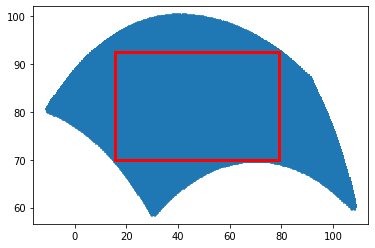

In [8]:
analysis.plot_reachable_area(r)

In [14]:
r['biggest_rectangle']

{'x_min': 15.53271534176357,
 'y_min': 70.03731638184873,
 'x_max': 79.0183913972859,
 'y_max': 92.47578894180106,
 'x_length': 63.485676055522326,
 'y_length': 22.43847255995233,
 'surface': 1424.5216001218605}

In [11]:
#sample biggest_rectangle
x_sampling = np.linspace(r['biggest_rectangle']['x_min'], r['biggest_rectangle']['x_max'], area_sampling)
y_sampling = np.linspace(r['biggest_rectangle']['y_min'], r['biggest_rectangle']['y_max'], area_sampling)

x_sampling = r['x']
y_sampling = r['y']
delta = 1

pos_error = analysis.estimate_precision(finger, x_sampling, y_sampling, delta, angle_A_limits, angle_B_limits)

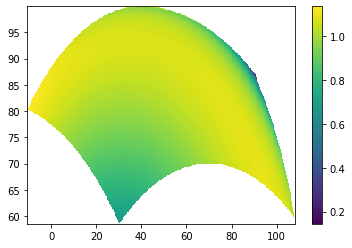

In [12]:
plt.imshow(pos_error.T, aspect='auto', 
           origin='lower', 
           extent=[min(x_sampling),max(x_sampling),min(y_sampling),max(y_sampling)], 
           interpolation='nearest')
plt.colorbar()
plt.show()